* Task 3: Correlation Between News Sentiment and Stock Movements (AAPL) 


## 🟩 1. Setup and Imports



In [1]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))
data_dir = "../data/"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import StockDataLoader, NewsDataLoader
from indicators import TechnicalIndicatorCalculator
from utils import TechnicalIndicatorPlotter, FinancialNewsEDA, FinancialNewsCorrelation
from metrics import PerformanceMetrics

ticker_1 = "AAPL"
ticker_2 = "AMZN"
ticker_3 = "GOOG"
ticker_4 = "MSFT"
ticker_5 = "NVDA"
ticker_6 = "TSLA"



## 🟩 2. Load and Preprocess News Data


In [2]:
# Load raw news data
news_df = pd.read_csv("../data/raw_analyst_ratings.csv")
eda = FinancialNewsEDA(news_df)

# Initialize EDA object and preprocess
news_eda = FinancialNewsEDA(news_df)
news_eda.preprocess()
news_eda.compute_sentiment()

# Extract relevant columns
news_processed = news_eda.df[["date", "sentiment"]].copy()
news_processed["date"] = pd.to_datetime(news_processed["date"]).dt.date





## 🟩 3. Load and Prepare Stock Data (AAPL)

In [3]:
# Load AAPL historical stock data
loader = StockDataLoader(data_dir=data_dir)

# Step 1: Load data
df = loader.load(ticker_1)

# Ensure 'date' column is in date format
df["date"] = df.index.date

# Compute daily returns
aapl_returns = FinancialNewsCorrelation.compute_daily_returns(df)
aapl_returns = aapl_returns[["date", "daily_return"]]



## 🟩 4. Aggregate Daily Sentiment Scores

In [4]:
# Group by date and average the sentiment scores
daily_sentiment = news_processed.groupby("date", as_index=False)["sentiment"].mean()
daily_sentiment.rename(columns={"sentiment": "avg_daily_sentiment"}, inplace=True)



## 🟩 5. Merge News and Stock Data by Date

In [5]:
merged_df = pd.merge(daily_sentiment, aapl_returns, on="date", how="inner").dropna()



## 🟩 6. Correlation Analysis


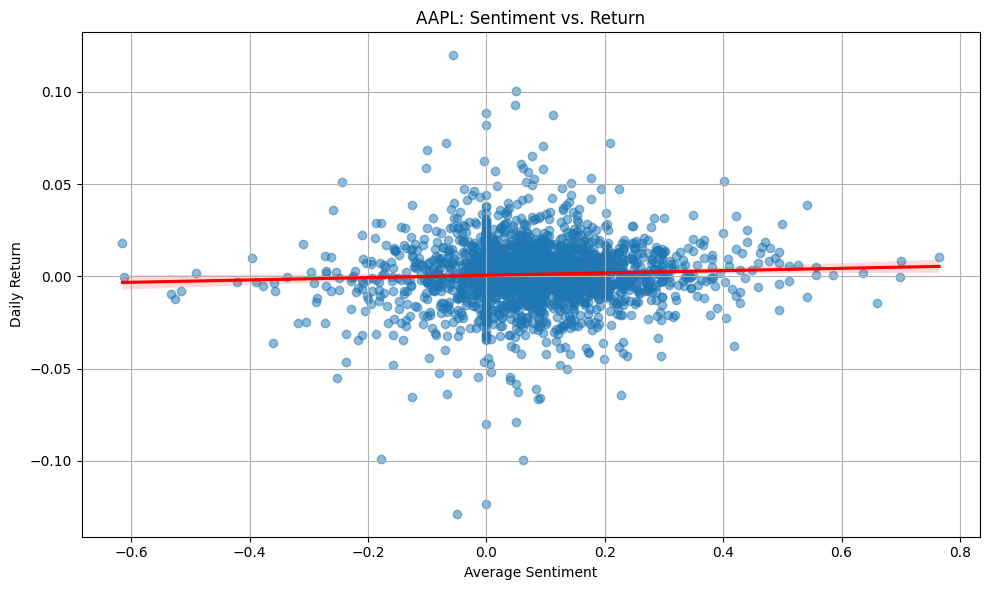

In [6]:
# Compute Pearson correlation
correlation = merged_df["avg_daily_sentiment"].corr(merged_df["daily_return"])

FinancialNewsCorrelation.plot_sentiment_vs_returns(merged_df, sentiment_col="avg_daily_sentiment", return_col="daily_return", title="AAPL: Sentiment vs. Return")

## 🟩 7. Summary

In [7]:
print(f"Pearson Correlation: {correlation:.4f}")
print(f"Merged Dataset Shape: {merged_df.shape}")
print(f"Date Range: {merged_df['date'].min()} to {merged_df['date'].max()}")

Pearson Correlation: 0.0483
Merged Dataset Shape: (2226, 3)
Date Range: 2011-04-27 to 2020-06-11
